# Project Name - Unsupervised ML - Netflix Movies and TV Shows Clustering

## Project Type - Unsupervised
## Name- Tanuja shinde

## **Project Summary**
this project is an exploratory data analysis (EDA) and clustering analysis of Netflix content data. The objective was to gain insights into the distribution, genres, and characteristics of Netflix content while applying machine learning techniques, particularly clustering, to uncover hidden patterns.

The initial phase of the project involves exploratory data analysis (EDA) to understand the structure and insights hidden in the dataset. This includes identifying the types of content available (TV Shows vs Movies), their distribution across countries, release years, ratings, and genres (listed_in). The dataset comprises 7787 entries with 12 columns, including metadata such as title, cast, country, director, date added, release year, and description. While there were missing values in columns like director, cast, and country, the data was clean from duplicate entries.

A TF-IDF vectorization technique was applied to convert the text-based 'description' and 'listed_in' feature into numerical format suitable for clustering. The text preprocessing steps included tokenization, stop word removal, lemmatization, and vectorization using TfidfVectorizer. The dimensionality of this data was then reduced using Principal Component Analysis (PCA) to make it easier to visualize and interpret.

With the vectorized and reduced features, K-Means clustering was implemented to group similar content. The optimal number of clusters was determined using the Elbow Method and Silhouette Scores, which helped understand the internal cohesion and separation of the clusters.

Hierarchical Clustering was also performed in the final steps of the project to validate and compare results obtained from K-Means clustering. Hierarchical clustering was visualized using a dendrogram, providing a different perspective on content similarity based on text-based features.

### **GitHub Link**


## **Problem Statement**

**Project Description**
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the
number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do**

Exploratory Data Analysis

Understanding what type content is available in different countries

If Netflix has been increasingly focusing on TV rather than movies in recent years

Clustering similar content by matching text-based features

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
import nltk
from nltk.corpus import stopwords
import string, unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings("ignore")

# Dataset Loading

In [64]:
df=pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [66]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [67]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


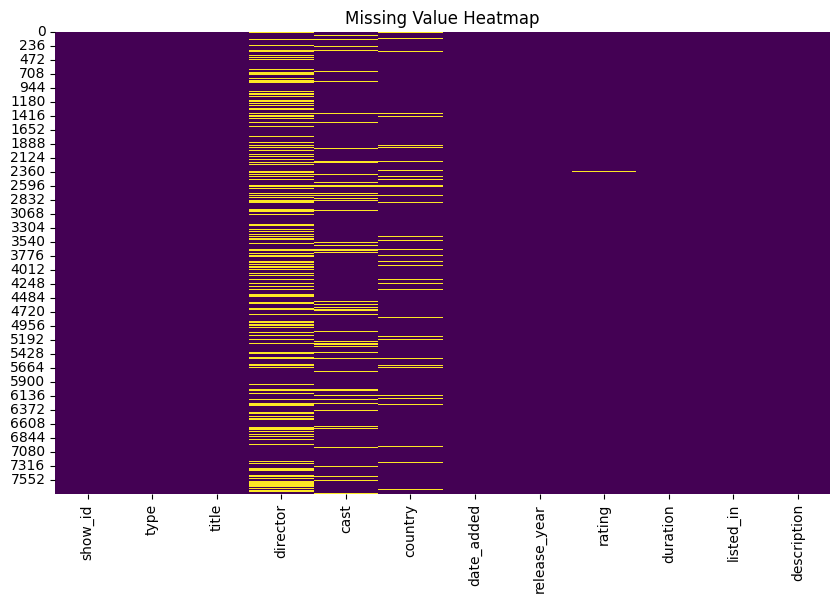

In [68]:
#Missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()



# Data Wrangling

Handling Missing value

In [69]:
# Here I can see multiple issues my data set.
# 1. Null values. Director column has major null values nearly 30% of data also important for clustering, cannot be removed.
    #Solution:Fill nulls with "Unknown" so clustering still works. Same with cast, country column.
    #rating column have 7 nulls Impact EDA and maybe content maturity analysis.
    #Solution:Fill with "Not Rated".
    #can drom null values in date_added

# Drop rows where 'date_added' is missing (only 10 rows)
df = df.dropna(subset=['date_added']).copy()

# Fill 'director' and 'cast' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# Fill 'country' with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Fill 'rating' with 'Not Rated'
df['rating'] = df['rating'].fillna('Not Rated')


In [70]:
# 2. date_added column is in object form. Need to convert that into datetime formate
# 3. duration column: For movies e.g. "90 min", for shows → "2 Seasons". Need to split into duration_int and duration_type

# Ensure all values are strings, then strip and convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')


# Clean & Split 'duration' into numeric value and type
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

In [71]:
# 4. listed_in column Has multiple genres in one cell (comma-separated). Needs parsing for clustering.

df['genres'] = df['listed_in'].astype(str).apply(lambda x: [genre.strip() for genre in x.split(',')])

#This adds a new column genres like:'Dramas', 'International Movies'
#before it was like "Draman, international movies"
# Basically created new column in list format


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        7777 non-null   object        
 1   type           7777 non-null   object        
 2   title          7777 non-null   object        
 3   director       7777 non-null   object        
 4   cast           7777 non-null   object        
 5   country        7777 non-null   object        
 6   date_added     7777 non-null   datetime64[ns]
 7   release_year   7777 non-null   int64         
 8   rating         7777 non-null   object        
 9   duration       7777 non-null   object        
 10  listed_in      7777 non-null   object        
 11  description    7777 non-null   object        
 12  duration_int   7777 non-null   int64         
 13  duration_type  7777 non-null   object        
 14  genres         7777 non-null   object        
dtypes: datetime64[ns](1), int6

In [73]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


**Handling Multiple Values in columns : country and listed_in**


In [74]:
# Exploding 'country'
df['country'] = df['country'].str.split(', ')
df = df.explode('country', ignore_index=True)

# Exploding 'listed_in'
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in', ignore_index=True)


In [75]:
# check shape of dataframe after exploding

df.shape

(20921, 15)

# **Changing Data type of "duration" to int**

In [76]:
df['duration'] = df['duration'].apply(lambda x: int(str(x).split()[0]))


In [77]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

,count
duration,
1,4167
2,932
3,489
4,222
5,150
6,63
7,50
8,35
9,21


In [78]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

### What all manipulations have you done and insights you found?

*   **Dropped null values in columns "date_added" and "ratings"**, as they contribute a very less percrntage.
*   **Filled null values in columns "director", "cast", and "country" with "Unknown"**, as they contribute a huge percentage, hence can not be dropped.

*   Changed **data type of "date_added" to datetime**.
*   **Exploded "country" and "listed_in"** columns to seprate the multiple values for better analysis.
*   After Exploding **now we have 20912 rows and 12 columns** in the dataset.
*   Converted **data type of "duration" column to int**




# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables


 Top 10 Countries with highest contribution of Movies or TV shows.**

In [79]:
highest_contribution_countries= df[df["country"].str.lower() != "unknown"]["country"].value_counts().reset_index().sort_values(by="count", ascending=False).head(10)

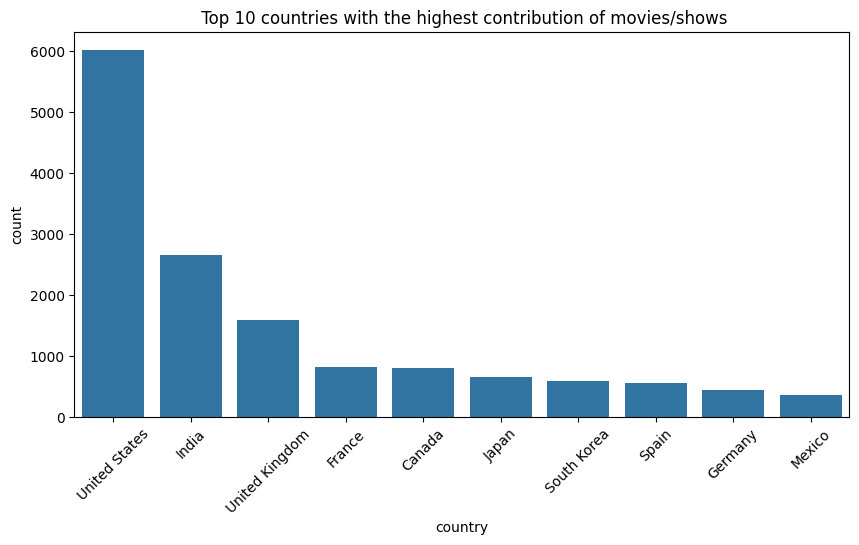

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(data=highest_contribution_countries,x="country",y="count")
plt.title(' Top 10 countries with the highest contribution of movies/shows')
plt.xticks(rotation=45)
plt.show()

**1. Why did you pick the specific chart?**

A bar chart is ideal for comparing the frequency of distinct categories.

It clearly shows which country dominates and by how much, making it perfect for analyzing categorical distributions.

**2. What is/are the insight(s) found from the chart?**

The highest number of movies / TV shows are from US, followed by India and UK.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Business Impact:**

The United States dominates the content library (6,009 titles), followed by India and the United Kingdom. This shows strong representation from a few major production hubs.

These countries can be prioritized for regional marketing campaigns, licensing deals, or localization strategies (e.g., dubbing or subtitles).

**Possible Insights Leading to Negative Growth:**

The concentration of content from a few select countries suggests limited geographic diversity in the catalog.

Underrepresentation of emerging markets or non-English-speaking regions may lead to lower engagement from those audiences.


**. TV Show duration**

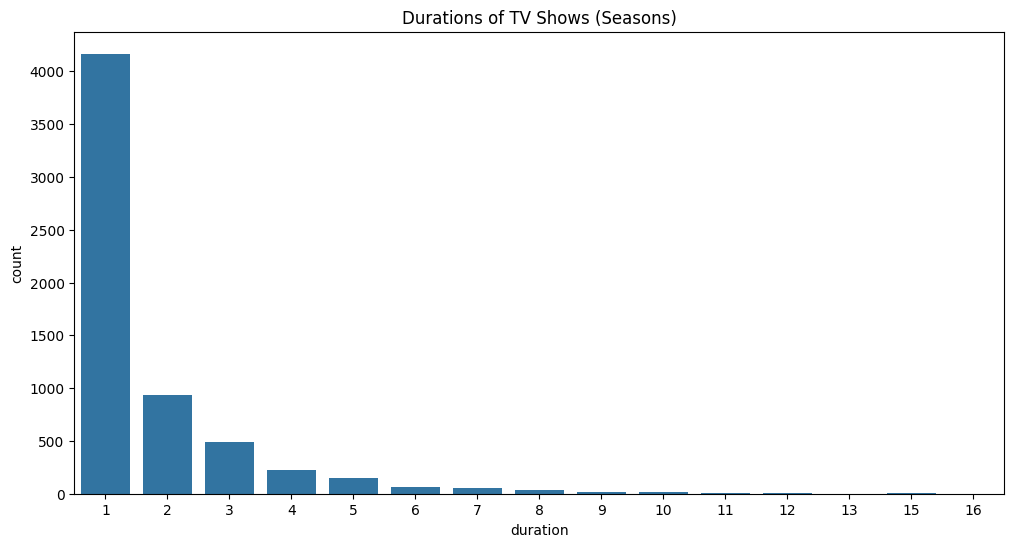

In [81]:
tv_duration=df[df['type']=='TV Show'].duration.value_counts().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(tv_duration,x="duration",y="count")
plt.title('Durations of TV Shows (Seasons)')
plt.show()


# **1. Why did you pick the specific chart?**

A histogram with KDE was selected because it effectively shows the distribution of content releases over time, allowing us to:

Identify trends in how the volume of movies and TV shows has changed year by year.

Understand whether the platform focuses more on recent content or includes a significant amount of older titles.

**2. What is/are the insight(s) found from the chart?**

Netflix has greater number of new movies / TV shows than the old ones.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Business Impact:**

The chart likely shows a sharp rise in content after around 2008. This reflects the platform's aggressive growth and content acquisition strategy during the streaming boom.

If there's a strong preference for recent content, the company can prioritize new releases to retain subscribers.

**Potential for Negative Growth:**

Chart shows very few titles before 2000, it suggests a lack of classic or archival content.

A decline in releases in the most recent years (e.g., post-2020) might indicate production slowdowns (possibly due to global events like COVID-19).


 Top genres in TV shows and Movies**

In [82]:
top_genres_by_type = df.groupby(['type', 'listed_in'])['title'].count().reset_index()
top_genres_by_type.columns = ['Type', 'Genre', 'Count']

In [83]:
# top 10 genres for each type
top_movies_genres = top_genres_by_type[top_genres_by_type['Type'] == 'Movie'].sort_values(by='Count', ascending=False).head(10)
top_tv_genres = top_genres_by_type[top_genres_by_type['Type'] == 'TV Show'].sort_values(by='Count', ascending=False).head(10)

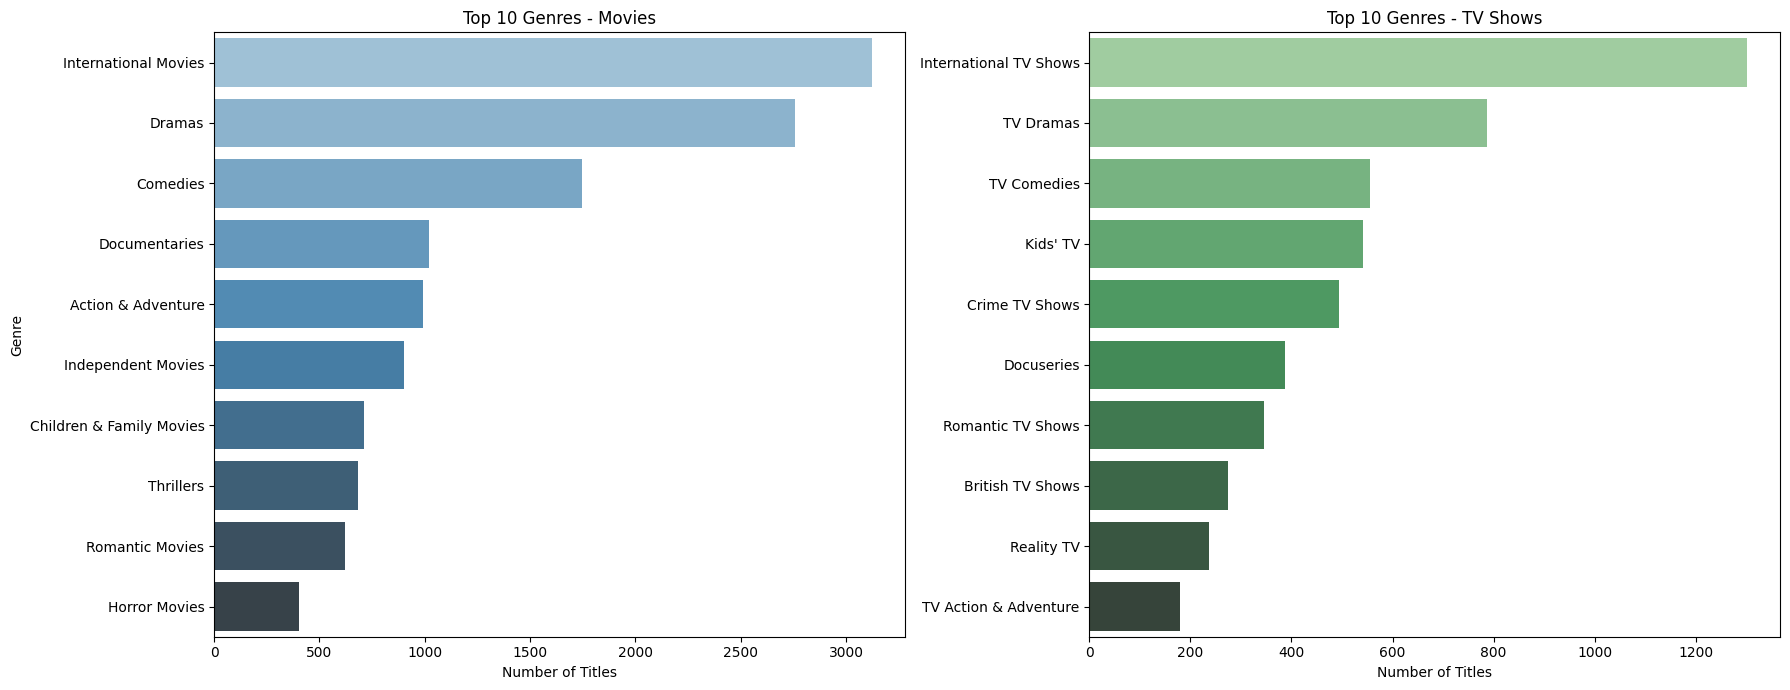

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharex=False)

sns.barplot(data=top_movies_genres, y='Genre', x='Count', ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Genres - Movies')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('Genre')


sns.barplot(data=top_tv_genres, y='Genre', x='Count', ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Genres - TV Shows')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('')


plt.tight_layout()
plt.show()

## **1. Why did you pick the specific chart?**

A horizontal bar chart clearly displays categorical data (genres) and their respective counts in a visually intuitive way.

Separating the charts for Movies and TV Shows allows us to compare the top 10 genres for each type without crowding a single plot, ensuring clarity and better genre-wise comparison.

**2. What is/are the insight(s) found from the chart?**

Most popular genre in Movies is International Movies followed by Dramas, Comedies and Documentries.

Most popular genre in TV Shows is International TV Shows followed by TV Dramas, TV Comedies and Kids TV.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive business decisions:**

Netflix can continue strengthening its catalog in the top-performing genres such as international content, dramas, and comedies, which clearly resonate with global audiences.

The strong presence of Kids TV under TV Shows also highlights an opportunity to attract and retain family and younger audiences.




 Country Genre Diversity**

In [85]:
country_genre_diversity =df.groupby("country")["listed_in"].nunique().reset_index()
country_genre_diversity.columns = ['Country', 'Unique_Genre_Count']


In [86]:
# Filter out "Unknown" countries

country_genre_diversity = country_genre_diversity[country_genre_diversity['Country'] != "Unknown"]

# Sort countries by the number of unique genres
country_genre_diversity = country_genre_diversity.sort_values('Unique_Genre_Count', ascending=False).reset_index(drop=True)

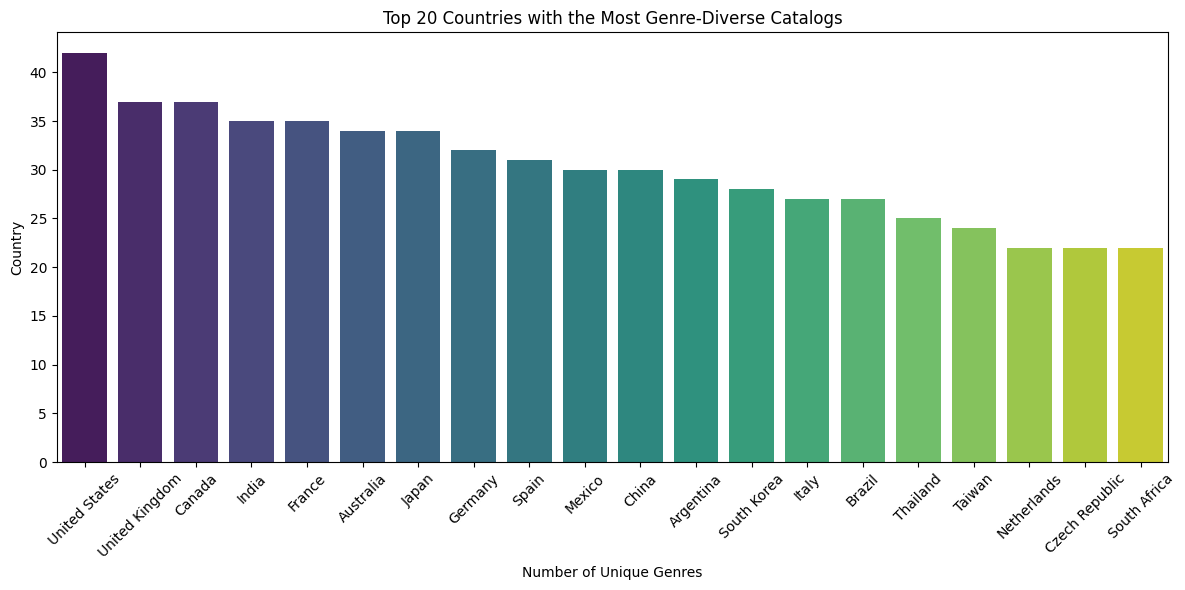

In [87]:
# Plotting genre diversity by country
plt.figure(figsize=(12,6))
sns.barplot(data=country_genre_diversity.head(20), x='Country', y='Unique_Genre_Count', palette='viridis')
plt.title('Top 20 Countries with the Most Genre-Diverse Catalogs')
plt.xlabel('Number of Unique Genres')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *** Feature Engineering & Data Pre-processing***

Cluster the shows on Netflix based on the following attributes:

Listed in (genres)

Description

In [88]:
df1 = df.copy()

In [89]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['listed_in'] +' ' + df1['description'])

**Lower Casing and Removing Stop Words**

In [90]:
# Download stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

# Display stopwords as numpy array
print(np.array(sw))

['a' 'about' 'above' 'after' 'again' 'against' 'ain' 'all' 'am' 'an' 'and'
 'any' 'are' 'aren' "aren't" 'as' 'at' 'be' 'because' 'been' 'before'
 'being' 'below' 'between' 'both' 'but' 'by' 'can' 'couldn' "couldn't" 'd'
 'did' 'didn' "didn't" 'do' 'does' 'doesn' "doesn't" 'doing' 'don' "don't"
 'down' 'during' 'each' 'few' 'for' 'from' 'further' 'had' 'hadn' "hadn't"
 'has' 'hasn' "hasn't" 'have' 'haven' "haven't" 'having' 'he' "he'd"
 "he'll" 'her' 'here' 'hers' 'herself' "he's" 'him' 'himself' 'his' 'how'
 'i' "i'd" 'if' "i'll" "i'm" 'in' 'into' 'is' 'isn' "isn't" 'it' "it'd"
 "it'll" "it's" 'its' 'itself' "i've" 'just' 'll' 'm' 'ma' 'me' 'mightn'
 "mightn't" 'more' 'most' 'mustn' "mustn't" 'my' 'myself' 'needn'
 "needn't" 'no' 'nor' 'not' 'now' 'o' 'of' 'off' 'on' 'once' 'only' 'or'
 'other' 'our' 'ours' 'ourselves' 'out' 'over' 'own' 're' 's' 'same'
 'shan' "shan't" 'she' "she'd" "she'll" "she's" 'should' 'shouldn'
 "shouldn't" "should've" 'so' 'some' 'such' 't' 'than' 'that' "that

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
# function to remove stop words
def stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [92]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)



**Remove Punctuations**

In [93]:
# function to remove punctuations

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [94]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)


# **Tokenization**

In [95]:
tokenizer = TweetTokenizer()

In [96]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(str(x)))


# **Vectorization**

In [97]:
clustering_data = df1['clustering_attributes']


In [98]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 500)
X = tfidf.fit_transform(clustering_data)


In [99]:
X.shape

(20921, 500)

In [100]:
type(X)

scipy.sparse._csr.csr_matrix

In [101]:
# convert X into array form for clustering
if not isinstance(X, np.ndarray):
    X = X.toarray()

# **Dimensionality Reduction**

Reduces training time.

Can improve accuracy by removing redundant or irrelevant features

Eliminates less important features (noise), making data cleaner and more meaningful.



In [102]:
# using PCA to reduce dimensionality

pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

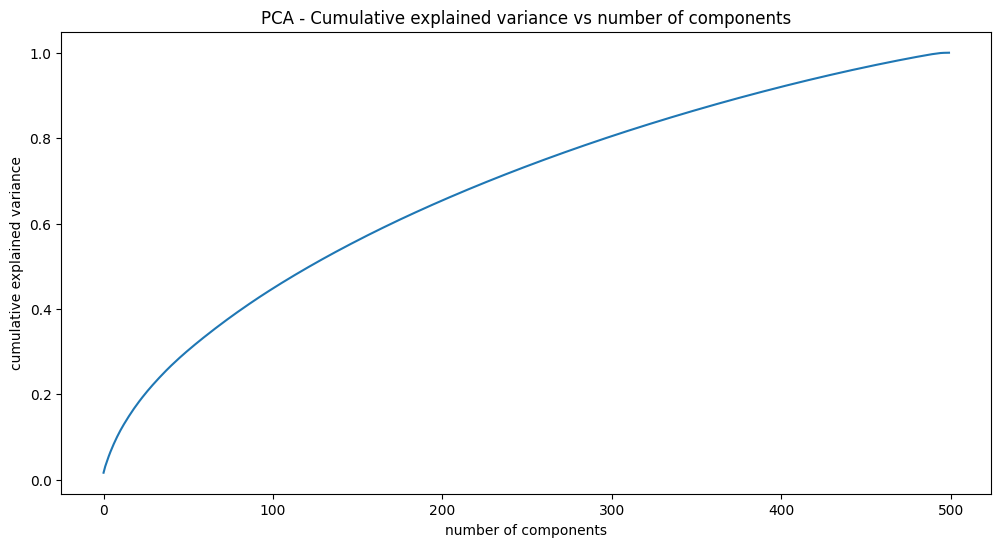

In [103]:
# Explained variance for different number of components
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [104]:
component_range = [2,4,5,10]
silhouette_scores = []

for n in component_range:
    print(f"\nRunning PCA with {n} components...")
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)

    # Apply KMeans
    kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters if needed
    labels = kmeans.fit_predict(X_pca)

    # Calculate silhouette score
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {n} components: {score:.4f}")



Running PCA with 2 components...
Silhouette Score for 2 components: 0.5400

Running PCA with 4 components...
Silhouette Score for 4 components: 0.4819

Running PCA with 5 components...
Silhouette Score for 5 components: 0.4049

Running PCA with 10 components...
Silhouette Score for 10 components: 0.2456


In [105]:
# reducing the dimensions to 2 using pca
pca = PCA(n_components=2,random_state=42)
pca.fit(X)

PCA(n_components=2, random_state=42)

In [106]:
x_pca = pca.transform(X)


In [107]:
# shape of transformed vectors
x_pca.shape


(20921, 2)


## ***ML Model Implementation***



# K Means Clustering

Elbow method to find the optimal value of k**

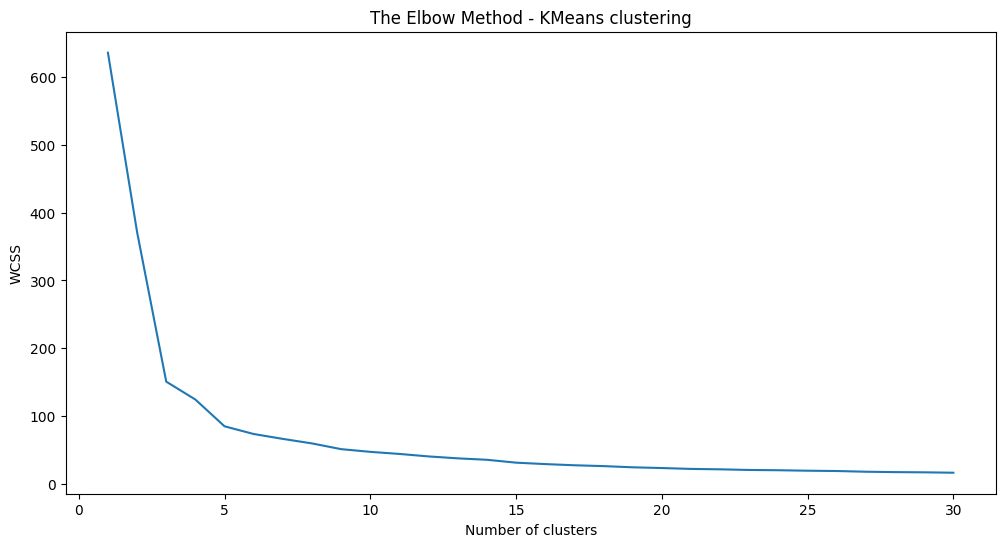

In [108]:
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(12,6))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


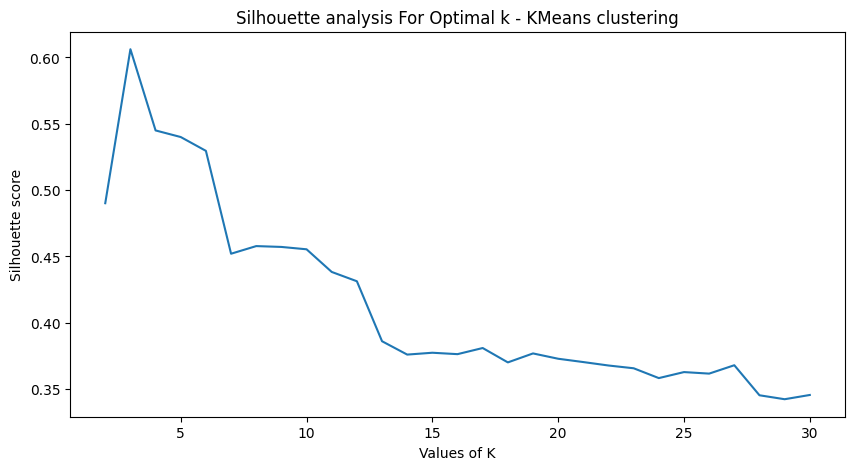

In [109]:
# Silhouette score for different number of clusters

range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [110]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(x_pca)

KMeans(n_clusters=4, random_state=42)

In [111]:
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(124.1658512877132, np.float64(0.5449953685809981))


In [112]:
df1['kmeans_cluster'] = kmeans.labels_

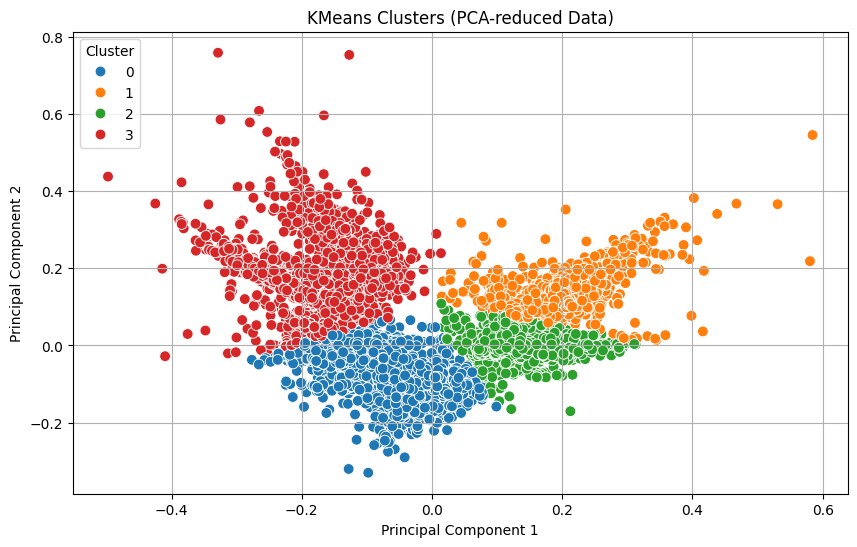

In [113]:
# Ensure df1 has the PCA columns (assume it's already included or merge if not)
df1['PC1'] = x_pca[:, 0]
df1['PC2'] = x_pca[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', hue='kmeans_cluster', palette='tab10', s=60)
plt.title('KMeans Clusters (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## **Hierarchical clustering**

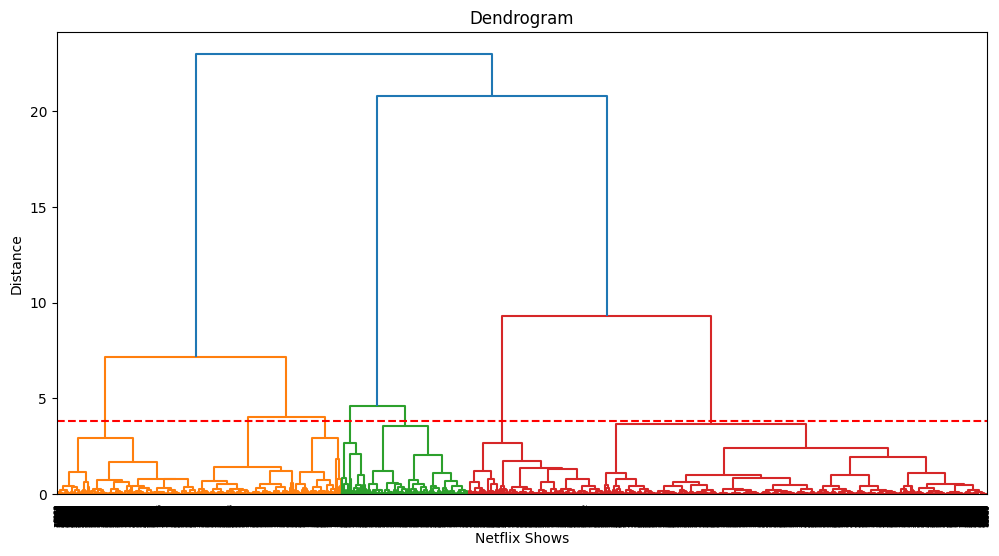

In [114]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(12, 6))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

## 7 clusters can be built using the agglomerative clustering algorithm.

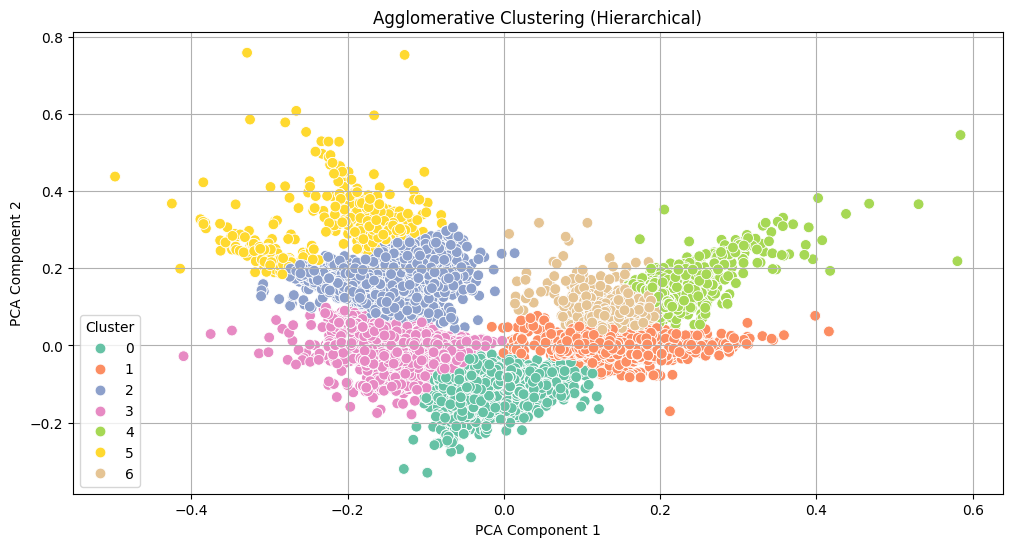

In [117]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

df1['hierarchical_cluster'] = hierarchical.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=labels, palette='Set2', s=60)
plt.title('Agglomerative Clustering (Hierarchical)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)

In [118]:
# Assuming X is your feature matrix (e.g., TF-IDF or PCA-reduced data)
hierarchical = AgglomerativeClustering(n_clusters=7, linkage='ward')
labels = hierarchical.fit_predict(x_pca)

# Compute silhouette score
score = silhouette_score(x_pca, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5089973882496126


## **Conclusion**

The Netflix content analysis project effectively used Exploratory Data Analysis, hypothesis testing, and clustering techniques to uncover meaningful insights from the dataset. By exploring the distribution of content types, genres, release years, and countries, we gained a deeper understanding of Netflix's content strategy. The clustering analysis provided an additional perspective by categorizing similar content, making it easier to identify content patterns.

## **How this project is useful for stakeholders**

*   **Content recommendation systems:** Grouping similar content helps in suggesting relevant shows or movies to users.

* **Market segmentation:** Understand user preferences in various countries based on popular clustered genres.

* **Content strategy:** Identify which types of content are growing in popularity and guide future production or licensing decisions.

* **Search optimization:** Enhance the search experience on platforms like Netflix by tagging and grouping content accurately.


